In [1]:
import psycopg2
import pandas as pd

connection = psycopg2.connect(                                                  
        user = "xai-db",                                      
        password = "DXsBxZnqjRSB",                                  
        host = "dan.ccsp.basf.net",                                            
        port = "41714",                                          
        database = "xai-db"                                       
    )

/tmp/ipykernel_2863985/145735486.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# outcome='TP'
xai_id='xai_5'
cursor = connection.cursor()
cursor.execute('SELECT xai_id, outcome, original_class, predicted_class, feedback_herrmj27 FROM lrp where xai_id=(%s) and feedback_herrmj27 is not null order by confidence;', (xai_id,))
result = cursor.fetchall()


df = pd.DataFrame(result, columns=['model_type', 'model_prediction', 'original_class', 'predicted_class', 'feedback'])

df['model_type'] = 'animal_split_9_cls'

df_FN = df[df['model_prediction'] == 'FN'].index

df_FN

df.drop(df_FN, inplace=True)

df_Missclassified = df[df['model_prediction'] == 'Missclassified'].index

df_Missclassified

df.drop(df_Missclassified, inplace=True)

# display(df)

df['Object_features']=df['feedback'].str.split('Cd').str[0]
df['Object_features']=df['Object_features'].str.split('Ob_').str[1]
df['Cd_features']=df['feedback'].str.split('Cd_').str[1]

df['Object_feature_1']=df['Object_features'].str.split('_').str[0]
df['Object_feature_2']=df['Object_features'].str.split('_').str[1]
df['Object_feature_3']=df['Object_features'].str.split('_').str[2]

df['Cd_feature_1']=df['Cd_features'].str.split('S').str[0]
df['Cd_feature_2']=df['Cd_features'].str.split('S').str[1]
# df['Cd_feature_3']=df['Cd_features'].str.split('_t').str[1]

display(df)


,model_type,model_prediction,original_class,predicted_class,feedback,Object_features,Cd_features,Object_feature_1,Object_feature_2,Object_feature_3,Cd_feature_1,Cd_feature_2
0,animal_split_9_cls,FP,BG,1,Ob_n_rs_Cd_wo_S1_3_true,n_rs_,wo_S1_3_true,n,rs,,wo_,1_3_true
1,animal_split_9_cls,FP,BG,4,Ob_n_Cd_rs_S4_6_true,n_,rs_S4_6_true,n,,NaN,rs_,4_6_true
2,animal_split_9_cls,TP,4,4,Ob_n_rs_Cd_wo_S4_6,n_rs_,wo_S4_6,n,rs,,wo_,4_6
3,animal_split_9_cls,TP,6,6,Ob_n_rs_Cd_rs,n_rs_,rs,n,rs,,rs,NaN
4,animal_split_9_cls,FP,BG,3,duplicate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,animal_split_9_cls,FP,BG,7,Ob_rsg_Cd_rs_true,rsg_,rs_true,rsg,,NaN,rs_true,NaN
6,animal_split_9_cls,FP,BG,7,Ob_rs_Cd_tp_S7_6_2_true,rs_,tp_S7_6_2_true,rs,,NaN,tp_,7_6_2_true
7,animal_split_9_cls,TP,4,4,Ob_n_rs_Cd_wo_S4_6,n_rs_,wo_S4_6,n,rs,,wo_,4_6
8,animal_split_9_cls,FP,BG,4,Ob_n_rs_Cd_wo_S4_6_true,n_rs_,wo_S4_6_true,n,rs,,wo_,4_6_true
9,animal_split_9_cls,TP,4,4,Ob_n_rs_Cd_wo_S4_6,n_rs_,wo_S4_6,n,rs,,wo_,4_6


In [3]:
# df['Cd_feature_1']=df['Cd_features'].str.split('S', n=1).str[0]
# df['Cd_feature_2']=df['Cd_features'].str.split('S', n=1).str[1]

# display(df)

In [4]:
# print("DF", df)
#######################################################################################ANIMAL_2_CLS#########################################################
xai_id='xai_4'
cursor = connection.cursor()
cursor.execute('SELECT xai_id, outcome, original_class, predicted_class, feedback_herrmj27 FROM lrp_2_classes where xai_id=(%s) and feedback_herrmj27 is not null order by confidence;', (xai_id,))
result_2_cls = cursor.fetchall()

df_2_cls = pd.DataFrame(result_2_cls, columns=['model_type', 'model_prediction', 'original_class', 'predicted_class', 'feedback'])
df_2_cls

df_2_cls['model_type'] = 'animal_split_2_cls'


df_FN = df_2_cls[df_2_cls['model_prediction'] == 'FN'].index

# print(df_FN)

df_2_cls.drop(df_FN, inplace=True)

df_Missclassified = df_2_cls[df_2_cls['model_prediction'] == 'Missclassified'].index

df_Missclassified

df_2_cls.drop(df_Missclassified, inplace=True)

# display(df_2_cls)

df_2_cls['Object_features']=df_2_cls['feedback'].str.split('Cd').str[0]
df_2_cls['Object_features']=df_2_cls['Object_features'].str.split('Ob_').str[1]
df_2_cls['Cd_features']=df_2_cls['feedback'].str.split('Cd_').str[1]
df_2_cls['Object_feature_1']=df_2_cls['Object_features'].str.split('_').str[0]
df_2_cls['Object_feature_2']=df_2_cls['Object_features'].str.split('_').str[1]
df_2_cls['Object_feature_3']=df_2_cls['Object_features'].str.split('_').str[2]

df_2_cls['Cd_feature_1']=df_2_cls['Cd_features'].str.split('S').str[0]
df_2_cls['Cd_feature_2']=df_2_cls['Cd_features'].str.split('S').str[1]
# df_2_cls['Cd_feature_3']=df_2_cls['Cd_features'].str.split('_').str[2]

display(df_2_cls)
df_combine = pd.concat([df, df_2_cls], axis=0, ignore_index=True)

# print(df_combine)

,model_type,model_prediction,original_class,predicted_class,feedback,Object_features,Cd_features,Object_feature_1,Object_feature_2,Object_feature_3,Cd_feature_1,Cd_feature_2
0,animal_split_2_cls,FP,BG,0,Ob_ds_rsn_rs_2rs_Cd_wo,ds_rsn_rs_2rs_,wo,ds,rsn,rs,wo,NaN
1,animal_split_2_cls,FP,BG,0,Ob_ds_rsn_rs_2rs_Cd_wo,ds_rsn_rs_2rs_,wo,ds,rsn,rs,wo,NaN
2,animal_split_2_cls,TP,1,1,Ob_n_rs_2rs_Cd_2rs_mislabeled,n_rs_2rs_,2rs_mislabeled,n,rs,2rs,2rs_mislabeled,NaN
3,animal_split_2_cls,FP,BG,0,Ob_rs_2rs_Cd_wo,rs_2rs_,wo,rs,2rs,,wo,NaN
4,animal_split_2_cls,TP,1,1,Ob_n_rs_Cd_tp,n_rs_,tp,n,rs,,tp,NaN
5,animal_split_2_cls,TP,1,1,Ob_n_rs_Cd_wo,n_rs_,wo,n,rs,,wo,NaN
6,animal_split_2_cls,TP,1,1,duplicate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,animal_split_2_cls,TP,0,0,Ob_n_rs_2rs_Cd_wo,n_rs_2rs_,wo,n,rs,2rs,wo,NaN
8,animal_split_2_cls,TP,1,1,duplicate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,animal_split_2_cls,TP,1,1,Ob_ds_rs_Cd_wo,ds_rs_,wo,ds,rs,,wo,NaN


## ALL animal split data

In [5]:
pd.set_option('display.max_rows', None)
df_combine

,model_type,model_prediction,original_class,predicted_class,feedback,Object_features,Cd_features,Object_feature_1,Object_feature_2,Object_feature_3,Cd_feature_1,Cd_feature_2
0,animal_split_9_cls,FP,BG,1,Ob_n_rs_Cd_wo_S1_3_true,n_rs_,wo_S1_3_true,n,rs,,wo_,1_3_true
1,animal_split_9_cls,FP,BG,4,Ob_n_Cd_rs_S4_6_true,n_,rs_S4_6_true,n,,NaN,rs_,4_6_true
2,animal_split_9_cls,TP,4,4,Ob_n_rs_Cd_wo_S4_6,n_rs_,wo_S4_6,n,rs,,wo_,4_6
3,animal_split_9_cls,TP,6,6,Ob_n_rs_Cd_rs,n_rs_,rs,n,rs,,rs,NaN
4,animal_split_9_cls,FP,BG,3,duplicate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,animal_split_9_cls,FP,BG,7,Ob_rsg_Cd_rs_true,rsg_,rs_true,rsg,,NaN,rs_true,NaN
6,animal_split_9_cls,FP,BG,7,Ob_rs_Cd_tp_S7_6_2_true,rs_,tp_S7_6_2_true,rs,,NaN,tp_,7_6_2_true
7,animal_split_9_cls,TP,4,4,Ob_n_rs_Cd_wo_S4_6,n_rs_,wo_S4_6,n,rs,,wo_,4_6
8,animal_split_9_cls,FP,BG,4,Ob_n_rs_Cd_wo_S4_6_true,n_rs_,wo_S4_6_true,n,rs,,wo_,4_6_true
9,animal_split_9_cls,TP,4,4,Ob_n_rs_Cd_wo_S4_6,n_rs_,wo_S4_6,n,rs,,wo_,4_6


In [6]:
df_combine.groupby(['model_type','model_prediction']).agg({'model_prediction':'count'})

model_prediction
model_type         model_prediction                  
animal_split_2_cls FP                              14
                   TP                              30
animal_split_9_cls FP                              25
                   TP                              33

In [7]:
df_TP_9_cls = df_combine[(df_combine.model_prediction == 'TP') & (df_combine.model_type == 'animal_split_9_cls')] #33
df_TP_2_cls = df_combine[(df_combine.model_prediction == 'TP') & (df_combine.model_type == 'animal_split_2_cls')] #33

In [8]:
df_FP_9_cls = df_combine[(df_combine.model_prediction == 'FP') & (df_combine.model_type == 'animal_split_9_cls')]
df_FP_2_cls = df_combine[(df_combine.model_prediction == 'FP') & (df_combine.model_type == 'animal_split_2_cls')] #33

In [9]:
print(df_FP_9_cls.groupby(['model_type','Object_feature_1']).agg({'Object_feature_1':'count'}))

print(df_FP_9_cls.groupby(['model_type','Object_feature_2']).agg({'Object_feature_2':'count'}))

print(df_FP_9_cls.groupby(['model_type','Object_feature_3']).agg({'Object_feature_3':'count'}))

print(df_FP_9_cls.groupby(['model_type','Cd_features']).agg({'Cd_features':'count'}))

print(df_FP_9_cls.groupby(['model_type','Cd_feature_2']).agg({'Cd_feature_2':'count'}))

# print(df_FP_9_cls.groupby(['model_type','Cd_feature_3']).agg({'Cd_feature_3':'count'}))

                                     Object_feature_1
model_type         Object_feature_1                  
animal_split_9_cls ls                               1
                   n                                9
                   rs                               8
                   rsg                              6
                                     Object_feature_2
model_type         Object_feature_2                  
animal_split_9_cls                                 12
                   ds                               1
                   ls                               2
                   rs                               6
                   rsg                              2
                   ts                               1
                                     Object_feature_3
model_type         Object_feature_3                  
animal_split_9_cls                                  9
                   ds                               2
                   rs       

In [10]:
df_FP_9_cls_OB1 = {}
for value in df_FP_9_cls['Object_feature_1']:
    df_FP_9_cls_OB1[value] = df_FP_9_cls_OB1.get(value, 0) + 1
print(df_FP_9_cls_OB1)

df_FP_9_cls_OB2 = {}
for value in df_FP_9_cls['Object_feature_2']:
    df_FP_9_cls_OB2[value] = df_FP_9_cls_OB2.get(value, 0) + 1
print(df_FP_9_cls_OB2)

df_FP_9_cls_OB3 = {}
for value in df_FP_9_cls['Object_feature_3']:
    df_FP_9_cls_OB3[value] = df_FP_9_cls_OB3.get(value, 0) + 1
print(df_FP_9_cls_OB3)

df_FP_2_cls_OB1 = {}
for value in df_FP_2_cls['Object_feature_1']:
    df_FP_2_cls_OB1[value] = df_FP_2_cls_OB1.get(value, 0) + 1
print(df_FP_2_cls_OB1)

df_FP_2_cls_OB2 = {}
for value in df_FP_2_cls['Object_feature_2']:
    df_FP_2_cls_OB2[value] = df_FP_2_cls_OB2.get(value, 0) + 1
print(df_FP_2_cls_OB2)

df_FP_2_cls_OB3 = {}
for value in df_FP_2_cls['Object_feature_3']:
    df_FP_2_cls_OB3[value] = df_FP_2_cls_OB3.get(value, 0) + 1
print(df_FP_2_cls_OB3)

df_TP_9_cls_OB1 = {}
for value in df_TP_9_cls['Object_feature_1']:
    df_TP_9_cls_OB1[value] = df_TP_9_cls_OB1.get(value, 0) + 1
print(df_TP_9_cls_OB1)

df_TP_9_cls_OB2 = {}
for value in df_TP_9_cls['Object_feature_2']:
    df_TP_9_cls_OB2[value] = df_TP_9_cls_OB2.get(value, 0) + 1
print(df_TP_9_cls_OB2)

df_TP_9_cls_OB3 = {}
for value in df_TP_9_cls['Object_feature_3']:
    df_TP_9_cls_OB3[value] = df_TP_9_cls_OB3.get(value, 0) + 1
print(df_TP_9_cls_OB3)


df_TP_2_cls_OB1 = {}
for value in df_TP_2_cls['Object_feature_1']:
    df_TP_2_cls_OB1[value] = df_TP_2_cls_OB1.get(value, 0) + 1
print(df_TP_2_cls_OB1)

df_TP_2_cls_OB2 = {}
for value in df_TP_2_cls['Object_feature_2']:
    df_TP_2_cls_OB2[value] = df_TP_2_cls_OB2.get(value, 0) + 1
print(df_TP_2_cls_OB2)

df_TP_2_cls_OB3 = {}
for value in df_TP_9_cls['Object_feature_3']:
    df_TP_2_cls_OB3[value] = df_TP_2_cls_OB3.get(value, 0) + 1
print(df_TP_2_cls_OB3)

########################################################################################################

df_FP_9_cls_Cd1 = {}
for value in df_FP_9_cls['Cd_feature_1']:
    df_FP_9_cls_Cd1[value] = df_FP_9_cls_Cd1.get(value, 0) + 1
print(df_FP_9_cls_Cd1)

df_FP_9_cls_Cd2 = {}
for value in df_FP_9_cls['Cd_feature_2']:
    df_FP_9_cls_Cd2[value] = df_FP_9_cls_Cd2.get(value, 0) + 1
print(df_FP_9_cls_Cd2)

# df_FP_9_cls_Cd3 = {}
# for value in df_FP_9_cls['Cd_feature_3']:
#     df_FP_9_cls_Cd3[value] = df_FP_9_cls_Cd3.get(value, 0) + 1
# print(df_FP_9_cls_Cd3)

df_FP_2_cls_Cd1 = {}
for value in df_FP_2_cls['Cd_feature_1']:
    df_FP_2_cls_Cd1[value] = df_FP_2_cls_Cd1.get(value, 0) + 1
print(df_FP_2_cls_Cd1)

df_FP_2_cls_Cd2 = {}
for value in df_FP_2_cls['Cd_feature_2']:
    df_FP_2_cls_Cd2[value] = df_FP_2_cls_Cd2.get(value, 0) + 1
print(df_FP_2_cls_Cd2)

# df_FP_2_cls_Cd3 = {}
# for value in df_FP_2_cls['Cd_feature_3']:
#     df_FP_2_cls_Cd3[value] = df_FP_2_cls_Cd3.get(value, 0) + 1
# print(df_FP_2_cls_Cd3)

df_TP_9_cls_Cd1 = {}
for value in df_TP_9_cls['Cd_feature_1']:
    df_TP_9_cls_Cd1[value] = df_TP_9_cls_Cd1.get(value, 0) + 1
print(df_TP_9_cls_Cd1)

df_TP_9_cls_Cd2 = {}
for value in df_TP_9_cls['Cd_feature_2']:
    df_TP_9_cls_Cd2[value] = df_TP_9_cls_Cd2.get(value, 0) + 1
print(df_TP_9_cls_Cd2)

# df_TP_9_cls_Cd3 = {}
# for value in df_TP_9_cls['Cd_feature_3']:
#     df_TP_9_cls_Cd3[value] = df_TP_9_cls_Cd3.get(value, 0) + 1
# print(df_TP_9_cls_Cd3)


df_TP_2_cls_Cd1 = {}
for value in df_TP_2_cls['Cd_feature_1']:
    df_TP_2_cls_Cd1[value] = df_TP_2_cls_Cd1.get(value, 0) + 1
print(df_TP_2_cls_Cd1)

df_TP_2_cls_Cd2 = {}
for value in df_TP_2_cls['Cd_feature_2']:
    df_TP_2_cls_Cd2[value] = df_TP_2_cls_Cd2.get(value, 0) + 1
print(df_TP_2_cls_Cd2)

# df_TP_2_cls_Cd3 = {}
# for value in df_TP_9_cls['Cd_feature_3']:
#     df_TP_2_cls_Cd3[value] = df_TP_2_cls_Cd3.get(value, 0) + 1
# print(df_TP_2_cls_Cd3)


{'n': 9, nan: 1, 'rsg': 6, 'rs': 8, 'ls': 1}
{'rs': 6, '': 12, nan: 1, 'rsg': 2, 'ls': 2, 'ds': 1, 'ts': 1}
{'': 9, nan: 13, 'rs': 1, 'ds': 2}
{'ds': 2, 'rs': 7, 'n': 3, 'rsn': 1, 'ls': 1}
{'rsn': 2, '2rs': 2, 'rs': 5, '': 4, 'rsg': 1}
{'rs': 2, '': 6, nan: 4, '2rs': 2}
{'n': 25, 'rs': 4, '': 1, 'ls': 1, nan: 2}
{'rs': 23, '': 5, nan: 3, 'rsg': 2}
{'': 25, nan: 8}
{'n': 16, nan: 6, 'ds': 1, 'rsn': 5, 'rs': 2}
{'rs': 19, nan: 6, '': 2, 'g2': 1, 'rsn': 2}
{'': 25, nan: 8}
{'wo_': 5, 'rs_': 2, nan: 1, 'rs_true': 1, 'tp_': 1, 'n': 1, 'ds_n_': 1, 'rsg_': 1, 'wo_True': 4, 'n_': 2, 'wo': 6}
{'1_3_true': 1, '4_6_true': 4, nan: 13, '7_6_2_true': 1, '_7_2_True': 1, '3_2_1_True': 1, '7_6_True': 1, '2_6_True': 1, '2_7_True': 1, '4_6_True': 1}
{'wo': 14}
{nan: 14}
{'wo_': 6, 'rs': 1, 'wo_s1_6': 1, 'wo_s4_6': 1, 'wo': 22, nan: 2}
{'4_6': 4, nan: 27, '1_6': 1, '1_2': 1}
{'2rs_mislabeled': 1, 'tp': 1, 'wo': 22, nan: 6}
{nan: 30}


# Class Difference

In [11]:
df_FP_9_cls_Cd1 = pd.DataFrame(df_FP_9_cls_Cd1.items(), columns=['Cd_feature', 'Frequency'])
# display(df_FP_9_cls_Cd1)
df_FP_9_cls_Cd2 = pd.DataFrame(df_FP_9_cls_Cd2.items(), columns=['Cd_feature', 'Frequency'])
# display(df_FP_9_cls_Cd2)
# df_FP_9_cls_Cd3 = pd.DataFrame(df_FP_9_cls_Cd3.items(), columns=['Cd_feature', 'Frequency'])
# display(df_FP_9_cls_Cd3)

pdList = [df_FP_9_cls_Cd1, df_FP_9_cls_Cd2]  # List of your dataframes___df_FP_9_cls_Cd3
df_FP_9_cls_Cd = pd.concat(pdList,ignore_index=True)
display(df_FP_9_cls_Cd)

df_FP_9_cls_Cd['FP_9_cls_Class_Difference_Feature_%'] = df_FP_9_cls_Cd.groupby('Cd_feature', as_index=False)['Frequency'].transform(sum)
display(df_FP_9_cls_Cd)

df_FP_9_cls_Cd = df_FP_9_cls_Cd.drop(['Frequency'], axis=1)
df_FP_9_cls_Cd = df_FP_9_cls_Cd.drop_duplicates(subset=['Cd_feature'])

df_FP_9_cls_Cd = df_FP_9_cls_Cd.drop(df_FP_9_cls_Cd[df_FP_9_cls_Cd.Cd_feature==''].index)
df_FP_9_cls_Cd = df_FP_9_cls_Cd.dropna()
display(df_FP_9_cls_Cd)

#######################################################################################################################################################

df_FP_2_cls_Cd1 = pd.DataFrame(df_FP_2_cls_Cd1.items(), columns=['Cd_feature', 'Frequency'])
df_FP_2_cls_Cd2 = pd.DataFrame(df_FP_2_cls_Cd2.items(), columns=['Cd_feature', 'Frequency'])
# df_FP_2_cls_Cd3 = pd.DataFrame(df_FP_2_cls_Cd3.items(), columns=['Cd_feature', 'Frequency'])


pdList = [df_FP_2_cls_Cd1, df_FP_2_cls_Cd2]  # List of your dataframes__df_FP_2_cls_Cd3
df_FP_2_cls_Cd = pd.concat(pdList,ignore_index=True)
# display(df_FP_2_cls)


df_FP_2_cls_Cd = df_FP_2_cls_Cd.drop(df_FP_2_cls_Cd[df_FP_2_cls_Cd.Cd_feature==''].index)
df_FP_2_cls_Cd = df_FP_2_cls_Cd.dropna()
# display(df_FP_2_cls)

# df_all.groupby(['Object_feature'])['Frequency'].sum()

df_FP_2_cls_Cd['FP_2_cls_Class_Difference_Feature_%'] = df_FP_2_cls_Cd.groupby('Cd_feature', as_index=False)['Frequency'].transform(sum)
# display(df_FP_2_cls)


df_FP_2_cls_Cd = df_FP_2_cls_Cd.drop(['Frequency'], axis=1)
df_FP_2_cls_Cd = df_FP_2_cls_Cd.drop_duplicates(subset=['Cd_feature'])
display(df_FP_2_cls_Cd)

#######################################################################################################################################################

df_TP_9_cls_Cd1 = pd.DataFrame(df_TP_9_cls_Cd1.items(), columns=['Cd_feature', 'Frequency'])
df_TP_9_cls_Cd2 = pd.DataFrame(df_TP_9_cls_Cd2.items(), columns=['Cd_feature', 'Frequency'])
# df_TP_9_cls_Cd3 = pd.DataFrame(df_TP_9_cls_Cd3.items(), columns=['Cd_feature', 'Frequency'])

df_TP_2_cls_Cd1 = pd.DataFrame(df_TP_2_cls_Cd1.items(), columns=['Cd_feature', 'Frequency'])
df_TP_2_cls_Cd2 = pd.DataFrame(df_TP_2_cls_Cd2.items(), columns=['Cd_feature', 'Frequency'])
# df_TP_2_cls_Cd3 = pd.DataFrame(df_TP_2_cls_Cd3.items(), columns=['Cd_feature', 'Frequency'])

pdList = [df_TP_9_cls_Cd1, df_TP_9_cls_Cd2]  # List of your dataframes_______df_TP_9_cls_Cd3
df_TP_9_cls_Cd = pd.concat(pdList,ignore_index=True)
# display(df_TP_9_cls)

pdList = [df_TP_2_cls_Cd1, df_TP_2_cls_Cd2]  # List of your dataframes_______df_TP_2_cls_Cd3
df_TP_2_cls_Cd = pd.concat(pdList,ignore_index=True)
# display(df_TP_2_cls)

df_TP_9_cls_Cd = df_TP_9_cls_Cd.drop(df_TP_9_cls_Cd[df_TP_9_cls_Cd.Cd_feature==''].index)
df_TP_9_cls_Cd = df_TP_9_cls_Cd.dropna()
# display(df_TP_9_cls)

df_TP_2_cls_Cd = df_TP_2_cls_Cd.drop(df_TP_2_cls_Cd[df_TP_2_cls_Cd.Cd_feature==''].index)
df_TP_2_cls_Cd = df_TP_2_cls_Cd.dropna()
# display(df_TP_2_cls)


df_TP_9_cls_Cd['TP_9_cls_Class_Difference_Feature_%'] = df_TP_9_cls_Cd.groupby('Cd_feature', as_index=False)['Frequency'].transform(sum)

df_TP_2_cls_Cd['TP_2_cls_Class_Difference_Feature_%'] = df_TP_2_cls_Cd.groupby('Cd_feature', as_index=False)['Frequency'].transform(sum)


df_TP_9_cls_Cd = df_TP_9_cls_Cd.drop(['Frequency'], axis=1)
df_TP_9_cls_Cd = df_TP_9_cls_Cd.drop_duplicates(subset=['Cd_feature'])
display(df_TP_9_cls_Cd)


df_TP_2_cls_Cd = df_TP_2_cls_Cd.drop(['Frequency'], axis=1)
df_TP_2_cls_Cd = df_TP_2_cls_Cd.drop_duplicates(subset=['Cd_feature'])
display(df_TP_2_cls_Cd)

,Cd_feature,Frequency
0,wo_,5
1,rs_,2
2,NaN,1
3,rs_true,1
4,tp_,1
5,n,1
6,ds_n_,1
7,rsg_,1
8,wo_True,4
9,n_,2


/tmp/ipykernel_2863985/1571253846.py:12: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_FP_9_cls_Cd['FP_9_cls_Class_Difference_Feature_%'] = df_FP_9_cls_Cd.groupby('Cd_feature', as_index=False)['Frequency'].transform(sum)


,Cd_feature,Frequency,FP_9_cls_Class_Difference_Feature_%
0,wo_,5,5.0
1,rs_,2,2.0
2,NaN,1,NaN
3,rs_true,1,1.0
4,tp_,1,1.0
5,n,1,1.0
6,ds_n_,1,1.0
7,rsg_,1,1.0
8,wo_True,4,4.0
9,n_,2,2.0


,Cd_feature,FP_9_cls_Class_Difference_Feature_%
0,wo_,5.0
1,rs_,2.0
3,rs_true,1.0
4,tp_,1.0
5,n,1.0
6,ds_n_,1.0
7,rsg_,1.0
8,wo_True,4.0
9,n_,2.0
10,wo,6.0


/tmp/ipykernel_2863985/1571253846.py:40: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_FP_2_cls_Cd['FP_2_cls_Class_Difference_Feature_%'] = df_FP_2_cls_Cd.groupby('Cd_feature', as_index=False)['Frequency'].transform(sum)


,Cd_feature,FP_2_cls_Class_Difference_Feature_%
0,wo,14


/tmp/ipykernel_2863985/1571253846.py:75: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_TP_9_cls_Cd['TP_9_cls_Class_Difference_Feature_%'] = df_TP_9_cls_Cd.groupby('Cd_feature', as_index=False)['Frequency'].transform(sum)
/tmp/ipykernel_2863985/1571253846.py:77: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_TP_2_cls_Cd['TP_2_cls_Class_Difference_Feature_%'] = df_TP_2_cls_Cd.groupby('Cd_feature', as_index=False)['Frequency'].transform(sum)


,Cd_feature,TP_9_cls_Class_Difference_Feature_%
0,wo_,6
1,rs,1
2,wo_s1_6,1
3,wo_s4_6,1
4,wo,22
6,4_6,4
8,1_6,1
9,1_2,1


,Cd_feature,TP_2_cls_Class_Difference_Feature_%
0,2rs_mislabeled,1
1,tp,1
2,wo,22


In [12]:
df_FP_9_cls_OB1 = pd.DataFrame(df_FP_9_cls_OB1.items(), columns=['Object_feature', 'Frequency'])
display(df_FP_9_cls_OB1)
df_FP_9_cls_OB2 = pd.DataFrame(df_FP_9_cls_OB2.items(), columns=['Object_feature', 'Frequency'])
display(df_FP_9_cls_OB2)
df_FP_9_cls_OB3 = pd.DataFrame(df_FP_9_cls_OB3.items(), columns=['Object_feature', 'Frequency'])
display(df_FP_9_cls_OB3)

pdList = [df_FP_9_cls_OB1, df_FP_9_cls_OB2, df_FP_9_cls_OB3]  # List of your dataframes
df_FP_9_cls = pd.concat(pdList,ignore_index=True)
display(df_FP_9_cls)

df_FP_9_cls['FP_9_cls_Feature_%'] = df_FP_9_cls.groupby('Object_feature', as_index=False)['Frequency'].transform(sum)
display(df_FP_9_cls)

df_FP_9_cls = df_FP_9_cls.drop(['Frequency'], axis=1)
df_FP_9_cls = df_FP_9_cls.drop_duplicates(subset=['Object_feature'])

df_FP_9_cls = df_FP_9_cls.drop(df_FP_9_cls[df_FP_9_cls.Object_feature==''].index)
df_FP_9_cls = df_FP_9_cls.dropna()
display(df_FP_9_cls)

df_FP_2_cls_OB1 = pd.DataFrame(df_FP_2_cls_OB1.items(), columns=['Object_feature', 'Frequency'])
df_FP_2_cls_OB2 = pd.DataFrame(df_FP_2_cls_OB2.items(), columns=['Object_feature', 'Frequency'])
df_FP_2_cls_OB3 = pd.DataFrame(df_FP_2_cls_OB3.items(), columns=['Object_feature', 'Frequency'])


pdList = [df_FP_2_cls_OB1, df_FP_2_cls_OB2, df_FP_2_cls_OB3]  # List of your dataframes
df_FP_2_cls = pd.concat(pdList,ignore_index=True)
# display(df_FP_2_cls)


df_FP_2_cls = df_FP_2_cls.drop(df_FP_2_cls[df_FP_2_cls.Object_feature==''].index)
df_FP_2_cls = df_FP_2_cls.dropna()
# display(df_FP_2_cls)

# df_all.groupby(['Object_feature'])['Frequency'].sum()

df_FP_2_cls['FP_2_cls_Feature_%'] = df_FP_2_cls.groupby('Object_feature', as_index=False)['Frequency'].transform(sum)
# display(df_FP_2_cls)


df_FP_2_cls = df_FP_2_cls.drop(['Frequency'], axis=1)
df_FP_2_cls = df_FP_2_cls.drop_duplicates(subset=['Object_feature'])
display(df_FP_2_cls)

df_TP_9_cls_OB1 = pd.DataFrame(df_TP_9_cls_OB1.items(), columns=['Object_feature', 'Frequency'])
df_TP_9_cls_OB2 = pd.DataFrame(df_TP_9_cls_OB2.items(), columns=['Object_feature', 'Frequency'])
df_TP_9_cls_OB3 = pd.DataFrame(df_TP_9_cls_OB3.items(), columns=['Object_feature', 'Frequency'])

df_TP_2_cls_OB1 = pd.DataFrame(df_TP_2_cls_OB1.items(), columns=['Object_feature', 'Frequency'])
df_TP_2_cls_OB2 = pd.DataFrame(df_TP_2_cls_OB2.items(), columns=['Object_feature', 'Frequency'])
df_TP_2_cls_OB3 = pd.DataFrame(df_TP_2_cls_OB3.items(), columns=['Object_feature', 'Frequency'])

pdList = [df_TP_9_cls_OB1, df_TP_9_cls_OB2, df_TP_9_cls_OB3]  # List of your dataframes
df_TP_9_cls = pd.concat(pdList,ignore_index=True)
# display(df_TP_9_cls)

pdList = [df_TP_2_cls_OB1, df_TP_2_cls_OB2, df_TP_2_cls_OB3]  # List of your dataframes
df_TP_2_cls = pd.concat(pdList,ignore_index=True)
# display(df_TP_2_cls)

df_TP_9_cls = df_TP_9_cls.drop(df_TP_9_cls[df_TP_9_cls.Object_feature==''].index)
df_TP_9_cls = df_TP_9_cls.dropna()
# display(df_TP_9_cls)

df_TP_2_cls = df_TP_2_cls.drop(df_TP_2_cls[df_TP_2_cls.Object_feature==''].index)
df_TP_2_cls = df_TP_2_cls.dropna()
# display(df_TP_2_cls)


df_TP_9_cls['TP_9_cls_Feature_%'] = df_TP_9_cls.groupby('Object_feature', as_index=False)['Frequency'].transform(sum)

df_TP_2_cls['TP_2_cls_Feature_%'] = df_TP_2_cls.groupby('Object_feature', as_index=False)['Frequency'].transform(sum)


df_TP_9_cls = df_TP_9_cls.drop(['Frequency'], axis=1)
df_TP_9_cls = df_TP_9_cls.drop_duplicates(subset=['Object_feature'])
display(df_TP_9_cls)


df_TP_2_cls = df_TP_2_cls.drop(['Frequency'], axis=1)
df_TP_2_cls = df_TP_2_cls.drop_duplicates(subset=['Object_feature'])
display(df_TP_2_cls)

,Object_feature,Frequency
0,n,9
1,NaN,1
2,rsg,6
3,rs,8
4,ls,1


,Object_feature,Frequency
0,rs,6
1,,12
2,NaN,1
3,rsg,2
4,ls,2
5,ds,1
6,ts,1


,Object_feature,Frequency
0,,9
1,NaN,13
2,rs,1
3,ds,2


,Object_feature,Frequency
0,n,9
1,NaN,1
2,rsg,6
3,rs,8
4,ls,1
5,rs,6
6,,12
7,NaN,1
8,rsg,2
9,ls,2


/tmp/ipykernel_2863985/2028147698.py:12: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_FP_9_cls['FP_9_cls_Feature_%'] = df_FP_9_cls.groupby('Object_feature', as_index=False)['Frequency'].transform(sum)


,Object_feature,Frequency,FP_9_cls_Feature_%
0,n,9,9.0
1,NaN,1,NaN
2,rsg,6,8.0
3,rs,8,15.0
4,ls,1,3.0
5,rs,6,15.0
6,,12,21.0
7,NaN,1,NaN
8,rsg,2,8.0
9,ls,2,3.0


,Object_feature,FP_9_cls_Feature_%
0,n,9.0
2,rsg,8.0
3,rs,15.0
4,ls,3.0
10,ds,3.0
11,ts,1.0


/tmp/ipykernel_2863985/2028147698.py:38: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_FP_2_cls['FP_2_cls_Feature_%'] = df_FP_2_cls.groupby('Object_feature', as_index=False)['Frequency'].transform(sum)


,Object_feature,FP_2_cls_Feature_%
0,ds,2
1,rs,14
2,n,3
3,rsn,3
4,ls,1
6,2rs,4
9,rsg,1


/tmp/ipykernel_2863985/2028147698.py:71: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_TP_9_cls['TP_9_cls_Feature_%'] = df_TP_9_cls.groupby('Object_feature', as_index=False)['Frequency'].transform(sum)
/tmp/ipykernel_2863985/2028147698.py:73: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_TP_2_cls['TP_2_cls_Feature_%'] = df_TP_2_cls.groupby('Object_feature', as_index=False)['Frequency'].transform(sum)


,Object_feature,TP_9_cls_Feature_%
0,n,25
1,rs,27
3,ls,1
8,rsg,2


,Object_feature,TP_2_cls_Feature_%
0,n,16
2,ds,1
3,rsn,7
4,rs,21
8,g2,1


In [13]:
df_FP_9_cls.at[11, 'Object_feature']='tc'

In [14]:
df_FP_9_cls

,Object_feature,FP_9_cls_Feature_%
0,n,9.0
2,rsg,8.0
3,rs,15.0
4,ls,3.0
10,ds,3.0
11,tc,1.0


In [15]:
df_FP_9_cls.rename(columns={'Object_feature': 'FP_9_cls_Features', 'FP_9_cls_Feature_%': 'Frequency(%)'}, inplace=True)
df_FP_9_cls

,FP_9_cls_Features,Frequency(%)
0,n,9.0
2,rsg,8.0
3,rs,15.0
4,ls,3.0
10,ds,3.0
11,tc,1.0


In [16]:
def swap_rows(df, row1, row2):
    df_FP_9_cls.iloc[row1], df_FP_9_cls.iloc[row2] =  df_FP_9_cls.iloc[row2].copy(), df_FP_9_cls.iloc[row1].copy()
    return df

print(df_FP_9_cls)

#swap rows in index positions 0 and 4
df_FP_9_cls = swap_rows(df_FP_9_cls, 0, 2)

#view updated DataFrame
print(df_FP_9_cls)


   FP_9_cls_Features  Frequency(%)
0                  n           9.0
2                rsg           8.0
3                 rs          15.0
4                 ls           3.0
10                ds           3.0
11                tc           1.0
   FP_9_cls_Features  Frequency(%)
0                 rs          15.0
2                rsg           8.0
3                  n           9.0
4                 ls           3.0
10                ds           3.0
11                tc           1.0


In [17]:
df_FP_9_cls = df_FP_9_cls.drop([4, 10])
df_FP_9_cls

,FP_9_cls_Features,Frequency(%)
0,rs,15.0
2,rsg,8.0
3,n,9.0
11,tc,1.0


In [18]:
def swap_rows(df, row1, row2):
    df_FP_9_cls.iloc[row1], df_FP_9_cls.iloc[row2] =  df_FP_9_cls.iloc[row2].copy(), df_FP_9_cls.iloc[row1].copy()
    return df

print(df_FP_9_cls)

#swap rows in index positions 0 and 4
df_FP_9_cls = swap_rows(df_FP_9_cls, 0, 2)

#view updated DataFrame
print(df_FP_9_cls)

   FP_9_cls_Features  Frequency(%)
0                 rs          15.0
2                rsg           8.0
3                  n           9.0
11                tc           1.0
   FP_9_cls_Features  Frequency(%)
0                  n           9.0
2                rsg           8.0
3                 rs          15.0
11                tc           1.0


In [19]:
def swap_rows(df, row1, row2):
    df_FP_9_cls.iloc[row1], df_FP_9_cls.iloc[row2] =  df_FP_9_cls.iloc[row2].copy(), df_FP_9_cls.iloc[row1].copy()
    return df

print(df_FP_9_cls)

#swap rows in index positions 0 and 4
df_FP_9_cls = swap_rows(df_FP_9_cls, 1, 2)

#view updated DataFrame
print(df_FP_9_cls)

   FP_9_cls_Features  Frequency(%)
0                  n           9.0
2                rsg           8.0
3                 rs          15.0
11                tc           1.0
   FP_9_cls_Features  Frequency(%)
0                  n           9.0
2                 rs          15.0
3                rsg           8.0
11                tc           1.0


In [20]:
import seaborn as sns
print(sns.color_palette(palette='Accent').as_hex())

['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666']


/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/se

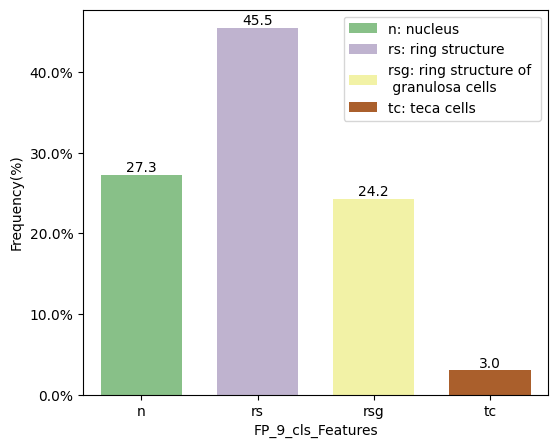

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns


df_FP_9_cls['Frequency(%)'] = df_FP_9_cls['Frequency(%)'].apply(lambda x: (x/df_FP_9_cls['Frequency(%)'].sum())*100)
labels = df_FP_9_cls['Frequency(%)'].round(1).astype('str')

# current_palette = sns.color_palette("BuGn_r", 10) 

palette = {'n':'#7fc97f','rs':'#beaed4','rsn':'#fdc086', 'rsg':'#ffff99', 'g2':'#386cb0', '2rs':'#f0027f', 'tc':'#bf5b17'}

ax = sns.barplot(df_FP_9_cls, x="FP_9_cls_Features", y="Frequency(%)", estimator="sum", errorbar=None, palette=palette, hue="FP_9_cls_Features", width=0.7)
ax.legend(loc='upper right', labels=['n: nucleus', 'rs: ring structure', 'rsg: ring structure of \n granulosa cells', 'tc: teca cells'])

ax.figure.set_size_inches(6,5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [22]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick
# import matplotlib.patches as mpatches
# import seaborn as sns


# df_FP_2_cls['FP_2_cls_Feature_%'] = df_FP_2_cls['FP_2_cls_Feature_%'].apply(lambda x: (x/df_FP_2_cls['FP_2_cls_Feature_%'].sum())*100)
# labels = df_FP_2_cls['FP_2_cls_Feature_%'].round(1).astype('str')

# ax = sns.barplot(df_FP_2_cls, x="Object_feature", y="FP_2_cls_Feature_%", estimator="sum", errorbar=None, palette=colors, hue="Object_feature", legend="full")
# ax.legend(loc='upper right', labels=['ds: dark_structures', 'rs: ring_structure', 'n: Nucleus', 'rsn: ring_structure_nucleus', 'ls: light_structures', '2rs: ring_structure', 'rsg: ring_structure_granulosa'])

# ax.figure.set_size_inches(7,5)

# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f')
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [23]:
df_FP_2_cls

,Object_feature,FP_2_cls_Feature_%
0,ds,2
1,rs,14
2,n,3
3,rsn,3
4,ls,1
6,2rs,4
9,rsg,1


In [24]:
df_FP_2_cls.rename(columns={'Object_feature': 'FP_2_cls_Features', 'FP_2_cls_Feature_%': 'Frequency(%)'}, inplace=True)
df_FP_2_cls

,FP_2_cls_Features,Frequency(%)
0,ds,2
1,rs,14
2,n,3
3,rsn,3
4,ls,1
6,2rs,4
9,rsg,1


In [25]:
df_FP_2_cls = df_FP_2_cls.drop([0, 4])
df_FP_2_cls

,FP_2_cls_Features,Frequency(%)
1,rs,14
2,n,3
3,rsn,3
6,2rs,4
9,rsg,1


In [26]:
def swap_rows(df, row1, row2):
    df_FP_2_cls.iloc[row1], df_FP_2_cls.iloc[row2] =  df_FP_2_cls.iloc[row2].copy(), df_FP_2_cls.iloc[row1].copy()
    return df

print(df_FP_2_cls)

#swap rows in index positions 0 and 4
df_FP_2_cls = swap_rows(df_FP_2_cls, 0, 1)

#view updated DataFrame
print(df_FP_2_cls)

  FP_2_cls_Features  Frequency(%)
1                rs            14
2                 n             3
3               rsn             3
6               2rs             4
9               rsg             1
  FP_2_cls_Features  Frequency(%)
1                 n             3
2                rs            14
3               rsn             3
6               2rs             4
9               rsg             1


In [27]:
def swap_rows(df, row1, row2):
    df_FP_2_cls.iloc[row1], df_FP_2_cls.iloc[row2] =  df_FP_2_cls.iloc[row2].copy(), df_FP_2_cls.iloc[row1].copy()
    return df

print(df_FP_2_cls)

#swap rows in index positions 0 and 4
df_FP_2_cls = swap_rows(df_FP_2_cls, 2, 3)

#view updated DataFrame
print(df_FP_2_cls)

  FP_2_cls_Features  Frequency(%)
1                 n             3
2                rs            14
3               rsn             3
6               2rs             4
9               rsg             1
  FP_2_cls_Features  Frequency(%)
1                 n             3
2                rs            14
3               2rs             4
6               rsn             3
9               rsg             1


In [28]:
def swap_rows(df, row1, row2):
    df_FP_2_cls.iloc[row1], df_FP_2_cls.iloc[row2] =  df_FP_2_cls.iloc[row2].copy(), df_FP_2_cls.iloc[row1].copy()
    return df

print(df_FP_2_cls)

#swap rows in index positions 0 and 4
df_FP_2_cls = swap_rows(df_FP_2_cls, 2, 4)

#view updated DataFrame
print(df_FP_2_cls)

  FP_2_cls_Features  Frequency(%)
1                 n             3
2                rs            14
3               2rs             4
6               rsn             3
9               rsg             1
  FP_2_cls_Features  Frequency(%)
1                 n             3
2                rs            14
3               rsg             1
6               rsn             3
9               2rs             4


/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/se

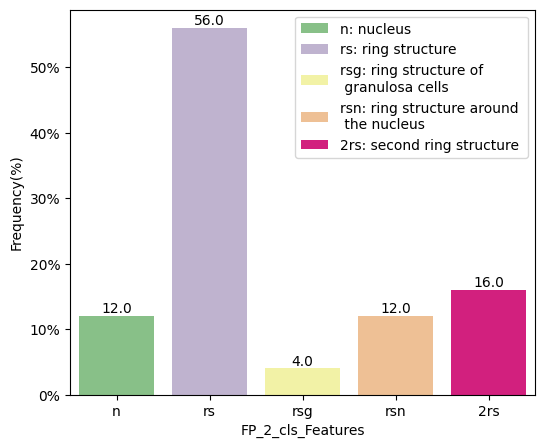

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns


df_FP_2_cls['Frequency(%)'] = df_FP_2_cls['Frequency(%)'].apply(lambda x: (x/df_FP_2_cls['Frequency(%)'].sum())*100)
labels = df_FP_2_cls['Frequency(%)'].round(1).astype('str')

palette = {'n':'#7fc97f','rs':'#beaed4','rsn':'#fdc086', 'rsg':'#ffff99', 'g2':'#386cb0', '2rs':'#f0027f', 'tc':'#bf5b17', 'tp':'#a16518', 'TP':'#167a72', 'wo':'#666666'}

ax = sns.barplot(df_FP_2_cls, x="FP_2_cls_Features", y="Frequency(%)", estimator="sum", errorbar=None, palette=palette, hue="FP_2_cls_Features", legend="full")
ax.legend(loc='upper right', labels=['n: nucleus', 'rs: ring structure', 'rsg: ring structure of \n granulosa cells', 'rsn: ring structure around \n the nucleus', '2rs: second ring structure'])

ax.figure.set_size_inches(6,5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [30]:
def swap_rows(df, row1, row2):
    df_TP_2_cls.iloc[row1], df_TP_2_cls.iloc[row2] =  df_TP_2_cls.iloc[row2].copy(), df_TP_2_cls.iloc[row1].copy()
    return df

print(df_TP_2_cls)

#swap rows in index positions 0 and 4
df_TP_2_cls = swap_rows(df_TP_2_cls, 1, 3)

#view updated DataFrame
print(df_TP_2_cls)


  Object_feature  TP_2_cls_Feature_%
0              n                  16
2             ds                   1
3            rsn                   7
4             rs                  21
8             g2                   1
  Object_feature  TP_2_cls_Feature_%
0              n                  16
2             rs                  21
3            rsn                   7
4             ds                   1
8             g2                   1


In [31]:
df_TP_2_cls

,Object_feature,TP_2_cls_Feature_%
0,n,16
2,rs,21
3,rsn,7
4,ds,1
8,g2,1


In [32]:
df_TP_2_cls.rename(columns={'Object_feature': 'TP_2_cls_Features', 'TP_2_cls_Feature_%': 'Frequency(%)'}, inplace=True)
df_TP_2_cls

,TP_2_cls_Features,Frequency(%)
0,n,16
2,rs,21
3,rsn,7
4,ds,1
8,g2,1


In [33]:
df_TP_2_cls = df_TP_2_cls.drop([4])
df_TP_2_cls

,TP_2_cls_Features,Frequency(%)
0,n,16
2,rs,21
3,rsn,7
8,g2,1


In [34]:
print(sns.color_palette(palette='Accent').as_hex())

['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666']


/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/se

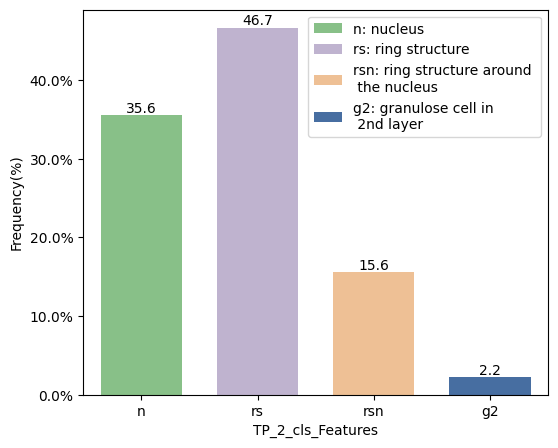

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns


df_TP_2_cls['Frequency(%)'] = df_TP_2_cls['Frequency(%)'].apply(lambda x: (x/df_TP_2_cls['Frequency(%)'].sum())*100)
labels = df_TP_2_cls['Frequency(%)'].round(1).astype('str')

# ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']

palette = {'n':'#7fc97f','rs':'#beaed4','rsn':'#fdc086', 'rsg':'#ffff99', 'g2':'#386cb0', '2rs':'#f0027f', 'tc':'#bf5b17', 'tp':'#a16518', 'TP':'#167a72', 'wo':'#666666'}

ax = sns.barplot(df_TP_2_cls, x="TP_2_cls_Features", y="Frequency(%)", estimator="sum", errorbar=None, palette=palette, hue="TP_2_cls_Features", legend="full", width=0.7)
ax.legend(loc='best', labels=['n: nucleus', 'rs: ring structure', 'rsn: ring structure around \n the nucleus', 'g2: granulose cell in \n 2nd layer'])

# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

ax.figure.set_size_inches(6,5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [36]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick

# df_TP_2_cls['TP_2_cls_Feature_%'] = df_TP_2_cls['TP_2_cls_Feature_%'].apply(lambda x: (x/df_TP_2_cls['TP_2_cls_Feature_%'].sum())*100)
# labels = df_TP_2_cls['TP_2_cls_Feature_%'].round(1).astype('str') + '%'
# ax = df_TP_2_cls.plot.bar(x='Object_feature', y='TP_2_cls_Feature_%', rot=0)
# for container in ax.containers:
#     ax.bar_label(container, labels=labels)
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [37]:
df_TP_9_cls

,Object_feature,TP_9_cls_Feature_%
0,n,25
1,rs,27
3,ls,1
8,rsg,2


In [38]:
df_TP_9_cls.rename(columns={'Object_feature': 'TP_9_cls_Features', 'TP_9_cls_Feature_%': 'Frequency(%)'}, inplace=True)
df_TP_9_cls

,TP_9_cls_Features,Frequency(%)
0,n,25
1,rs,27
3,ls,1
8,rsg,2


In [39]:
df_TP_9_cls = df_TP_9_cls.drop([3])
df_TP_9_cls

,TP_9_cls_Features,Frequency(%)
0,n,25
1,rs,27
8,rsg,2


/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


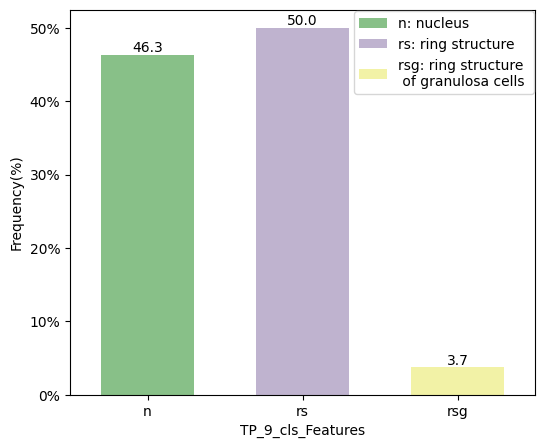

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns


df_TP_9_cls['Frequency(%)'] = df_TP_9_cls['Frequency(%)'].apply(lambda x: (x/df_TP_9_cls['Frequency(%)'].sum())*100)
labels = df_TP_9_cls['Frequency(%)'].round(1).astype('str')

palette = {'n':'#7fc97f','rs':'#beaed4','rsn':'#fdc086', 'rsg':'#ffff99', 'g2':'#386cb0', '2rs':'#f0027f', 'tc':'#bf5b17', 'tp':'#a16518', 'TP':'#167a72', 'wo':'#666666'}

ax = sns.barplot(df_TP_9_cls, x="TP_9_cls_Features", y="Frequency(%)", estimator="sum", errorbar=None, palette=palette, hue="TP_9_cls_Features", width=0.6)
ax.legend(loc='best', labels=['n: nucleus', 'rs: ring structure','rsg: ring structure \n of granulosa cells'], borderaxespad=0.1)

# prop={'size':8.7}
# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

ax.figure.set_size_inches(6,5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [41]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick

# df_TP_9_cls['TP_9_cls_Feature_%'] = df_TP_9_cls['TP_9_cls_Feature_%'].apply(lambda x: (x/df_TP_9_cls['TP_9_cls_Feature_%'].sum())*100)
# labels = df_TP_9_cls['TP_9_cls_Feature_%'].round(1).astype('str') + '%'
# ax = df_TP_9_cls.plot.bar(x='Object_feature', y='TP_9_cls_Feature_%', rot=0)
# for container in ax.containers:
#     ax.bar_label(container, labels=labels)
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Class Difference

In [42]:
df_FP_9_cls_Cd = df_FP_9_cls_Cd.reset_index(drop=True)

df_FP_9_cls_Cd

,Cd_feature,FP_9_cls_Class_Difference_Feature_%
0,wo_,5.0
1,rs_,2.0
2,rs_true,1.0
3,tp_,1.0
4,n,1.0
5,ds_n_,1.0
6,rsg_,1.0
7,wo_True,4.0
8,n_,2.0
9,wo,6.0


In [43]:
for i in range(10,19):
    df_FP_9_cls_Cd.loc[i, 'Cd_feature'] = 'S' + df_FP_9_cls_Cd.loc[i, 'Cd_feature']

df_FP_9_cls_Cd.loc[5, 'Cd_feature'] = 'ds'

df_FP_9_cls_Cd.loc[4, 'FP_9_cls_Class_Difference_Feature_%'] = 2.0



df_FP_9_cls_Cd.loc[0, 'Cd_feature'] = 'wo'
df_FP_9_cls_Cd.loc[1, 'Cd_feature'] = 'rs'

df_FP_9_cls_Cd.loc[2, 'Cd_feature'] = 'rs'
df_FP_9_cls_Cd.loc[3, 'Cd_feature'] = 'tp'

df_FP_9_cls_Cd.loc[6, 'Cd_feature'] = 'rsg'
df_FP_9_cls_Cd.loc[7, 'Cd_feature'] = 'wo'
df_FP_9_cls_Cd.loc[8, 'Cd_feature'] = 'n'

df_FP_9_cls_Cd.loc[10, 'Cd_feature'] = 'S1_3_True' #1_3_true

df_FP_9_cls_Cd.loc[11, 'Cd_feature'] = 'S4_6_True' #4_6_true
df_FP_9_cls_Cd.loc[12, 'Cd_feature'] = 'S7_6_2_True' #S7_6_2_true
df_FP_9_cls_Cd.loc[13, 'Cd_feature'] = 'S7_2_True' #_7_2_True


df_FP_9_cls_Cd['FP_9_cls_Class_Difference_Feature_%'] = df_FP_9_cls_Cd.groupby('Cd_feature', as_index=False)['FP_9_cls_Class_Difference_Feature_%'].transform(sum)


df_FP_9_cls_Cd = df_FP_9_cls_Cd.drop_duplicates(subset=['Cd_feature'])

df_FP_9_cls_Cd = df_FP_9_cls_Cd.reset_index(drop=True)


display(df_FP_9_cls_Cd)


/tmp/ipykernel_2863985/2575298076.py:27: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_FP_9_cls_Cd['FP_9_cls_Class_Difference_Feature_%'] = df_FP_9_cls_Cd.groupby('Cd_feature', as_index=False)['FP_9_cls_Class_Difference_Feature_%'].transform(sum)


,Cd_feature,FP_9_cls_Class_Difference_Feature_%
0,wo,15.0
1,rs,3.0
2,tp,1.0
3,n,4.0
4,ds,1.0
5,rsg,1.0
6,S1_3_True,1.0
7,S4_6_True,5.0
8,S7_6_2_True,1.0
9,S7_2_True,1.0


In [44]:
# df_FP_9_cls_Cd.loc[0, 'Cd_feature'] = 'whole_object'
# df_FP_9_cls_Cd.loc[1, 'Cd_feature'] = 'ring_structure_not_granulosa'
# df_FP_9_cls_Cd.loc[2, 'Cd_feature'] = 'textual_patterns'
# df_FP_9_cls_Cd.loc[3, 'Cd_feature'] = 'nucleus'
# df_FP_9_cls_Cd.loc[4, 'Cd_feature'] = 'dark_structures'
# df_FP_9_cls_Cd.loc[5, 'Cd_feature'] = 'ring_structure_granulosa'

In [45]:
df_FP_9_cls_Cd

,Cd_feature,FP_9_cls_Class_Difference_Feature_%
0,wo,15.0
1,rs,3.0
2,tp,1.0
3,n,4.0
4,ds,1.0
5,rsg,1.0
6,S1_3_True,1.0
7,S4_6_True,5.0
8,S7_6_2_True,1.0
9,S7_2_True,1.0


In [46]:
df_FP_9_cls_Cd['Cd_feature']=df_FP_9_cls_Cd['Cd_feature'].str.split('_T').str[0]

In [47]:
df_FP_9_cls_Cd.loc[len(df_FP_9_cls_Cd.index)] = ['TP', 10.0] 


In [48]:
df_FP_9_cls_Cd

,Cd_feature,FP_9_cls_Class_Difference_Feature_%
0,wo,15.0
1,rs,3.0
2,tp,1.0
3,n,4.0
4,ds,1.0
5,rsg,1.0
6,S1_3,1.0
7,S4_6,5.0
8,S7_6_2,1.0
9,S7_2,1.0


In [49]:
def swap_rows(df, row1, row2):
    df_FP_9_cls_Cd.iloc[row1], df_FP_9_cls_Cd.iloc[row2] =  df_FP_9_cls_Cd.iloc[row2].copy(), df_FP_9_cls_Cd.iloc[row1].copy()
    return df

print(df_FP_9_cls_Cd)

#swap rows in index positions 0 and 4
df_FP_9_cls_Cd = swap_rows(df_FP_9_cls_Cd, 14, 2)

df_FP_9_cls_Cd = swap_rows(df_FP_9_cls_Cd, 7, 4)

#view updated DataFrame
print(df_FP_9_cls_Cd)


   Cd_feature  FP_9_cls_Class_Difference_Feature_%
0          wo                                 15.0
1          rs                                  3.0
2          tp                                  1.0
3           n                                  4.0
4          ds                                  1.0
5         rsg                                  1.0
6        S1_3                                  1.0
7        S4_6                                  5.0
8      S7_6_2                                  1.0
9        S7_2                                  1.0
10     S3_2_1                                  1.0
11       S7_6                                  1.0
12       S2_6                                  1.0
13       S2_7                                  1.0
14         TP                                 10.0
   Cd_feature  FP_9_cls_Class_Difference_Feature_%
0          wo                                 15.0
1          rs                                  3.0
2          TP                  

In [50]:
# df_FP_9_cls_Cd

indexAge = df_FP_9_cls_Cd[df_FP_9_cls_Cd['Cd_feature'].str[:1].str.startswith('S')==True].index
print(indexAge)
print(len(indexAge))


df_FP_9_cls_Cd.drop(indexAge , inplace=True)

Index([4, 6, 8, 9, 10, 11, 12, 13], dtype='int64')
8


In [51]:
df_FP_9_cls_Cd

,Cd_feature,FP_9_cls_Class_Difference_Feature_%
0,wo,15.0
1,rs,3.0
2,TP,10.0
3,n,4.0
5,rsg,1.0
7,ds,1.0
14,tp,1.0


In [52]:
df_FP_9_cls_Cd.rename(columns={'Cd_feature': 'FP_9_cls_CD_Features', 'FP_9_cls_Class_Difference_Feature_%': 'Frequency(%)'}, inplace=True)

df_FP_9_cls_Cd

,FP_9_cls_CD_Features,Frequency(%)
0,wo,15.0
1,rs,3.0
2,TP,10.0
3,n,4.0
5,rsg,1.0
7,ds,1.0
14,tp,1.0


In [53]:
df_FP_9_cls_Cd = df_FP_9_cls_Cd.drop([7])
df_FP_9_cls_Cd

,FP_9_cls_CD_Features,Frequency(%)
0,wo,15.0
1,rs,3.0
2,TP,10.0
3,n,4.0
5,rsg,1.0
14,tp,1.0


In [54]:
import seaborn as sns
print(sns.color_palette(palette='Accent').as_hex())

['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666']


In [55]:
print(sns.color_palette(palette='BrBG').as_hex())

['#a16518', '#dbb972', '#f6ecd1', '#d4ede9', '#76c6ba', '#167a72']


In [56]:
df_FP_9_cls_Cd

,FP_9_cls_CD_Features,Frequency(%)
0,wo,15.0
1,rs,3.0
2,TP,10.0
3,n,4.0
5,rsg,1.0
14,tp,1.0


In [57]:
def swap_rows(df, row1, row2):
    df_FP_9_cls_Cd.iloc[row1], df_FP_9_cls_Cd.iloc[row2] =  df_FP_9_cls_Cd.iloc[row2].copy(), df_FP_9_cls_Cd.iloc[row1].copy()
    return df

print(df_FP_9_cls_Cd)

#swap rows in index positions 0 and 4
df_FP_9_cls = swap_rows(df_FP_9_cls_Cd, 1, 2)

#view updated DataFrame
print(df_FP_9_cls_Cd)

   FP_9_cls_CD_Features  Frequency(%)
0                    wo          15.0
1                    rs           3.0
2                    TP          10.0
3                     n           4.0
5                   rsg           1.0
14                   tp           1.0
   FP_9_cls_CD_Features  Frequency(%)
0                    wo          15.0
1                    TP          10.0
2                    rs           3.0
3                     n           4.0
5                   rsg           1.0
14                   tp           1.0


In [58]:
def swap_rows(df, row1, row2):
    df_FP_9_cls_Cd.iloc[row1], df_FP_9_cls_Cd.iloc[row2] =  df_FP_9_cls_Cd.iloc[row2].copy(), df_FP_9_cls_Cd.iloc[row1].copy()
    return df

print(df_FP_9_cls_Cd)

#swap rows in index positions 0 and 4
df_FP_9_cls = swap_rows(df_FP_9_cls_Cd, 2, 3)

#view updated DataFrame
print(df_FP_9_cls_Cd)

   FP_9_cls_CD_Features  Frequency(%)
0                    wo          15.0
1                    TP          10.0
2                    rs           3.0
3                     n           4.0
5                   rsg           1.0
14                   tp           1.0
   FP_9_cls_CD_Features  Frequency(%)
0                    wo          15.0
1                    TP          10.0
2                     n           4.0
3                    rs           3.0
5                   rsg           1.0
14                   tp           1.0


In [59]:
df_FP_9_cls_Cd.at[1, 'FP_9_cls_CD_Features'] = 'TL'

In [60]:
df_FP_9_cls_Cd

,FP_9_cls_CD_Features,Frequency(%)
0,wo,15.0
1,TL,10.0
2,n,4.0
3,rs,3.0
5,rsg,1.0
14,tp,1.0


/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/se

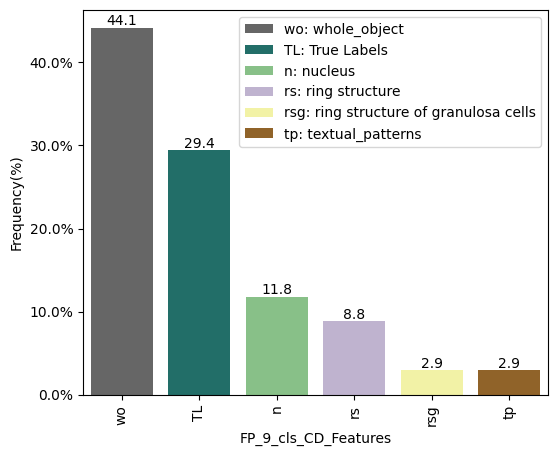

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns


df_FP_9_cls_Cd['Frequency(%)'] = df_FP_9_cls_Cd['Frequency(%)'].apply(lambda x: (x/df_FP_9_cls_Cd['Frequency(%)'].sum())*100)
labels = df_FP_9_cls_Cd['Frequency(%)'].round(1).astype('str')

palette = {'n':'#7fc97f','rs':'#beaed4','rsn':'#fdc086', 'rsg':'#ffff99', 'g2':'#386cb0', '2rs':'#f0027f', 'tc':'#bf5b17', 'tp':'#a16518', 'TL':'#167a72', 'wo':'#666666'}

ax = sns.barplot(df_FP_9_cls_Cd, x="FP_9_cls_CD_Features", y="Frequency(%)", estimator="sum", errorbar=None, palette=palette, hue="FP_9_cls_CD_Features", legend="full")
ax.legend(loc='best', labels=['wo: whole_object', 'TL: True Labels', 'n: nucleus', 'rs: ring structure', 'rsg: ring structure of granulosa cells', 'tp: textual_patterns'])
                              # 'S1_3: Similar Class 1 & 3', 'S4_6: Similar Class class 4 & 6', 'S7_6_2: Similar Class 7,6 & 2', 'S7_2: Similar Class 7 & 2', 'S3_2_1: Similar Class 3,2 & 1', 
                              # 'S7_6: Similar Class 7 & 6', 'S2_6: cSimilar Class 2 & 6', 'S2_7: Similar Class 2 & 7','TP: True positive'])
ax.tick_params(axis='x', labelrotation=90)

# 'ds: dark_structures', 'rs: ring_structure', 'n: Nucleus', 'rsn: ring_structure_nucleus', 'ls: light_structures', '2rs: second_ring_structure', 'rsg: ring_structure_granulosa'

# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

ax.figure.set_size_inches(6,5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [60]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick

# df_FP_9_cls_Cd['FP_9_cls_Class_Difference_Feature_%'] = df_FP_9_cls_Cd['FP_9_cls_Class_Difference_Feature_%'].apply(lambda x: (x/df_FP_9_cls_Cd['FP_9_cls_Class_Difference_Feature_%'].sum())*100)
# labels = df_FP_9_cls_Cd['FP_9_cls_Class_Difference_Feature_%'].round(1).astype('str') + '%'
# ax = df_FP_9_cls_Cd.plot.bar(x='Cd_feature', y='FP_9_cls_Class_Difference_Feature_%', rot=90, figsize=(11, 7)) 

# for container in ax.containers:
#     ax.bar_label(container, labels=labels)
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [64]:
df_FP_2_cls_Cd

,Cd_feature,FP_2_cls_Class_Difference_Feature_%
0,wo,14


In [65]:
df_FP_2_cls_Cd.rename(columns={'Cd_feature': 'FP_2_cls_CD_Features', 'FP_2_cls_Class_Difference_Feature_%': 'Frequency(%)'}, inplace=True)

df_FP_2_cls_Cd

,FP_2_cls_CD_Features,Frequency(%)
0,wo,14


/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


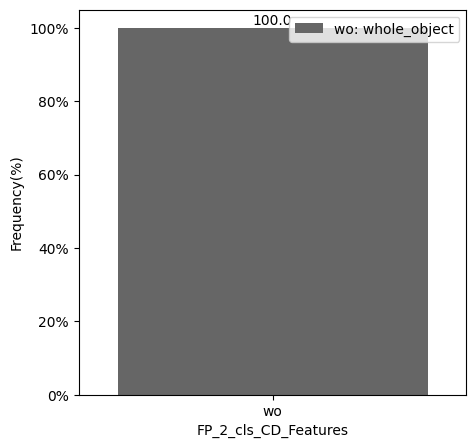

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns


df_FP_2_cls_Cd['Frequency(%)'] = df_FP_2_cls_Cd['Frequency(%)'].apply(lambda x: (x/df_FP_2_cls_Cd['Frequency(%)'].sum())*100)
labels = df_FP_2_cls_Cd['Frequency(%)'].round(1).astype('str')

palette = {'n':'#7fc97f','rs':'#beaed4','rsn':'#fdc086', 'rsg':'#ffff99', 'g2':'#386cb0', '2rs':'#f0027f', 'tc':'#bf5b17', 'tp':'#a16518', 'TP':'#167a72', 'wo':'#666666'}

ax = sns.barplot(df_FP_2_cls_Cd, x="FP_2_cls_CD_Features", y="Frequency(%)", estimator="sum", errorbar=None, palette=palette, hue="FP_2_cls_CD_Features", legend="full")
ax.legend(loc='best', labels=['wo: whole_object'])

# 'ds: dark_structures', 'rs: ring_structure', 'n: Nucleus', 'rsn: ring_structure_nucleus', 'ls: light_structures', '2rs: second_ring_structure', 'rsg: ring_structure_granulosa'

# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

ax.figure.set_size_inches(5,5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [67]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick

# df_FP_2_cls_Cd['FP_2_cls_Class_Difference_Feature_%'] = df_FP_2_cls_Cd['FP_2_cls_Class_Difference_Feature_%'].apply(lambda x: (x/df_FP_2_cls_Cd['FP_2_cls_Class_Difference_Feature_%'].sum())*100)
# labels = df_FP_2_cls_Cd['FP_2_cls_Class_Difference_Feature_%'].round(1).astype('str') + '%'
# ax = df_FP_2_cls_Cd.plot.bar(x='Cd_feature', y='FP_2_cls_Class_Difference_Feature_%', rot=0, figsize=(11, 3))
# for container in ax.containers:
#     ax.bar_label(container, labels=labels)
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [68]:
# df_TP_2_cls_Cd['Cd_feature'] = df_TP_2_cls_Cd['Cd_feature'].str.split('_')
# df_TP_2_cls_Cd = df_TP_2_cls_Cd.explode('Cd_feature')

# df_TP_2_cls_Cd

In [69]:
df_TP_2_cls_Cd.at[0, 'Cd_feature'] = '2rs'

In [70]:
def swap_rows(df, row1, row2):
    df_TP_2_cls_Cd.iloc[row1], df_TP_2_cls_Cd.iloc[row2] =  df_TP_2_cls_Cd.iloc[row2].copy(), df_TP_2_cls_Cd.iloc[row1].copy()
    return df

print(df_TP_2_cls_Cd)

#swap rows in index positions 0 and 4
df_TP_2_cls_Cd = swap_rows(df_TP_2_cls_Cd, 0, 2)

#view updated DataFrame
print(df_TP_2_cls_Cd)

  Cd_feature  TP_2_cls_Class_Difference_Feature_%
0        2rs                                    1
1         tp                                    1
2         wo                                   22
  Cd_feature  TP_2_cls_Class_Difference_Feature_%
0         wo                                   22
1         tp                                    1
2        2rs                                    1


In [71]:
df_TP_2_cls_Cd

,Cd_feature,TP_2_cls_Class_Difference_Feature_%
0,wo,22
1,tp,1
2,2rs,1


In [72]:
df_TP_2_cls_Cd.rename(columns={'Cd_feature': 'TP_2_cls_CD_Features', 'TP_2_cls_Class_Difference_Feature_%': 'Frequency(%)'}, inplace=True)

df_TP_2_cls_Cd

,TP_2_cls_CD_Features,Frequency(%)
0,wo,22
1,tp,1
2,2rs,1


/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


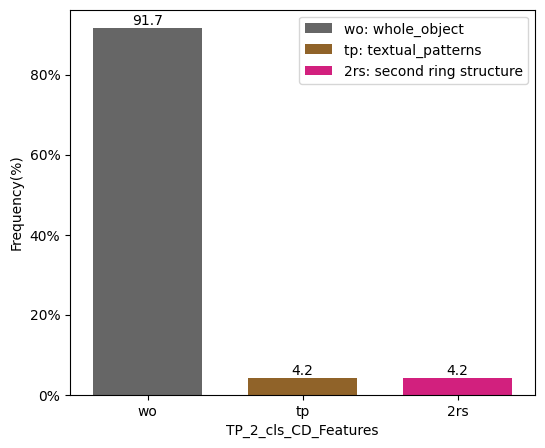

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns


df_TP_2_cls_Cd['Frequency(%)'] = df_TP_2_cls_Cd['Frequency(%)'].apply(lambda x: (x/df_TP_2_cls_Cd['Frequency(%)'].sum())*100)
labels = df_TP_2_cls_Cd['Frequency(%)'].round(1).astype('str')

palette = {'n':'#7fc97f','rs':'#beaed4','rsn':'#fdc086', 'rsg':'#ffff99', 'g2':'#386cb0', '2rs':'#f0027f', 'tc':'#bf5b17', 'tp':'#a16518', 'TP':'#167a72', 'wo':'#666666'}

ax = sns.barplot(df_TP_2_cls_Cd, x="TP_2_cls_CD_Features", y="Frequency(%)", estimator="sum", errorbar=None, palette=palette, hue="TP_2_cls_CD_Features", legend="full", width=0.7)
ax.legend(loc='best', labels=['wo: whole_object', 'tp: textual_patterns', '2rs: second ring structure'])

# 'ds: dark_structures', 'rs: ring_structure', 'n: Nucleus', 'rsn: ring_structure_nucleus', 'ls: light_structures', '2rs: second_ring_structure', 'rsg: ring_structure_granulosa'

# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

ax.figure.set_size_inches(6,5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [71]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick

# df_TP_2_cls_Cd['TP_2_cls_Class_Difference_Feature_%'] = df_TP_2_cls_Cd['TP_2_cls_Class_Difference_Feature_%'].apply(lambda x: (x/df_TP_2_cls_Cd['TP_2_cls_Class_Difference_Feature_%'].sum())*100)
# labels = df_TP_2_cls_Cd['TP_2_cls_Class_Difference_Feature_%'].round(1).astype('str') + '%'
# ax = df_TP_2_cls_Cd.plot.bar(x='Cd_feature', y='TP_2_cls_Class_Difference_Feature_%', rot=0)
# for container in ax.containers:
#     ax.bar_label(container, labels=labels)
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#     # ax.legend(["2rs: second ring structure","mislabled"])


In [77]:
df_FP_9_cls_Cd = df_FP_9_cls_Cd.reset_index(inplace=True)
display(df_TP_9_cls_Cd)

,Cd_feature,TP_9_cls_Class_Difference_Feature_%
0,wo_,6
1,rs,1
2,wo_s1_6,1
3,wo_s4_6,1
4,wo,22
6,4_6,4
8,1_6,1
9,1_2,1


In [78]:
df_TP_9_cls_Cd = df_TP_9_cls_Cd.reset_index(drop=True)
display(df_TP_9_cls_Cd)
df_TP_9_cls_Cd.loc[0, 'Cd_feature'] = 'wo' #wo_
df_TP_9_cls_Cd.loc[2, 'Cd_feature'] = 'S1_6' #wo_s1_6
df_TP_9_cls_Cd.loc[3, 'Cd_feature'] = 'S4_6' #wo_s4_6
df_TP_9_cls_Cd.loc[0, 'TP_9_cls_Class_Difference_Feature_%'] = 8 #6

for i in range(5,8):
    df_TP_9_cls_Cd.loc[i, 'Cd_feature'] = 'S' + df_TP_9_cls_Cd.loc[i, 'Cd_feature']


df_TP_9_cls_Cd['TP_9_cls_Class_Difference_Feature_%'] = df_TP_9_cls_Cd.groupby('Cd_feature', as_index=False)['TP_9_cls_Class_Difference_Feature_%'].transform(sum)


df_TP_9_cls_Cd = df_TP_9_cls_Cd.drop_duplicates(subset=['Cd_feature'])


,Cd_feature,TP_9_cls_Class_Difference_Feature_%
0,wo_,6
1,rs,1
2,wo_s1_6,1
3,wo_s4_6,1
4,wo,22
5,4_6,4
6,1_6,1
7,1_2,1


/tmp/ipykernel_2863985/727537819.py:12: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_TP_9_cls_Cd['TP_9_cls_Class_Difference_Feature_%'] = df_TP_9_cls_Cd.groupby('Cd_feature', as_index=False)['TP_9_cls_Class_Difference_Feature_%'].transform(sum)


In [79]:
df_TP_9_cls_Cd

,Cd_feature,TP_9_cls_Class_Difference_Feature_%
0,wo,30
1,rs,1
2,S1_6,2
3,S4_6,5
7,S1_2,1


In [80]:
df_TP_9_cls_Cd.rename(columns={'Cd_feature': 'TP_9_cls_CD_Features', 'TP_9_cls_Class_Difference_Feature_%': 'Frequency(%)'}, inplace=True)

df_TP_9_cls_Cd

,TP_9_cls_CD_Features,Frequency(%)
0,wo,30
1,rs,1
2,S1_6,2
3,S4_6,5
7,S1_2,1


In [81]:
df_TP_9_cls_Cd = df_TP_9_cls_Cd.drop([2, 3, 7])
df_TP_9_cls_Cd

,TP_9_cls_CD_Features,Frequency(%)
0,wo,30
1,rs,1


/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/akanksha/.venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


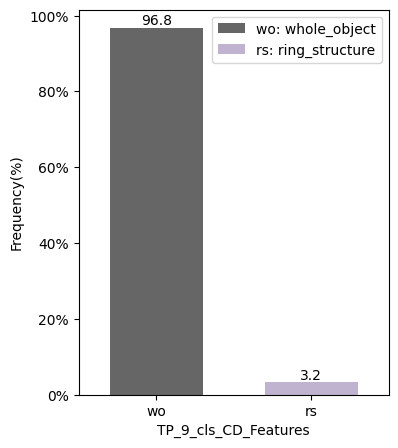

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns


df_TP_9_cls_Cd['Frequency(%)'] = df_TP_9_cls_Cd['Frequency(%)'].apply(lambda x: (x/df_TP_9_cls_Cd['Frequency(%)'].sum())*100)
labels = df_TP_9_cls_Cd['Frequency(%)'].round(1).astype('str')

palette = {'n':'#7fc97f','rs':'#beaed4','rsn':'#fdc086', 'rsg':'#ffff99', 'g2':'#386cb0', '2rs':'#f0027f', 'tc':'#bf5b17', 'tp':'#a16518', 'TP':'#167a72', 'wo':'#666666'}

ax = sns.barplot(df_TP_9_cls_Cd, x="TP_9_cls_CD_Features", y="Frequency(%)", estimator="sum", errorbar=None, palette=palette, hue="TP_9_cls_CD_Features", width=0.6)
ax.legend(loc='best', labels=['wo: whole_object', 'rs: ring_structure'])

# 'S1_6: Similar Class 1 & 6', 'S4_6: Similar Class 4 & 6', 'S1_2: Similar Class 1 & 2'

# 'ds: dark_structures', 'rs: ring_structure', 'n: Nucleus', 'rsn: ring_structure_nucleus', 'ls: light_structures', '2rs: second_ring_structure', 'rsg: ring_structure_granulosa'

# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

ax.figure.set_size_inches(4,5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [45]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick

# df_TP_9_cls_Cd['TP_9_cls_Class_Difference_Feature_%'] = df_TP_9_cls_Cd['TP_9_cls_Class_Difference_Feature_%'].apply(lambda x: (x/df_TP_9_cls_Cd['TP_9_cls_Class_Difference_Feature_%'].sum())*100)
# labels = df_TP_9_cls_Cd['TP_9_cls_Class_Difference_Feature_%'].round(1).astype('str') + '%'
# ax = df_TP_9_cls_Cd.plot.bar(x='Cd_feature', y='TP_9_cls_Class_Difference_Feature_%', rot=0)
# for container in ax.containers:
#     ax.bar_label(container, labels=labels)
#     ax.yaxis.set_major_formatter(mtick.PercentFormatter())